In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 4

#### Para la siguiente densidad de probabilidad, se pide:

![grafico_densidad](img/grafico_densidad_4.png)

#### a)  Definir la función de densidad de probabilidad.

A partir de dicho gráfico, se puede definir la función de densidad expresada a continuación.

![densidad_4](img/densidad_4.png)

Donde se puede verificar que la integral de la misma entre menos y más infinito vale, efectivamente, 1.

![integral_densidad_4](img/integral_densidad_4.png)

#### b)  Calcular y graficar la función de probabilidad acumulada y su inversa.

Integrando de a trozos la expresión anterior y sumando la probabilidad acumulada, se pudo calcular la función de distribución de probabilidad, quedando de la siguiente manera.

![distribucion_4](img/distribucion_4.png)

Además, las funciones cuadráticas de la misma se expresaron de forma canónica para facilitar el cálculo de la inversa.

![distribucion_canonica_4](img/distribucion_canonica_4.png)

A continuación, se procede a graficar esta función.

In [2]:
# Se define la función de distribución
def F(x):
    x = np.array(x)
    return np.piecewise(x, [x<1, (1<=x) & (x<2), (2<=x) & (x<5), 
                            (5<=x) & (x<7), (7<=x) & (x<10), 10<=x], 
                           [0,
                            lambda x: ((x - 1)**2)/18,
                            lambda x: (x/9) - (1/6),
                            lambda x: (((x - 2.5)**2)/45) + .25,
                            lambda x: -(((x - 10)**2)/30) + 1,
                            1])

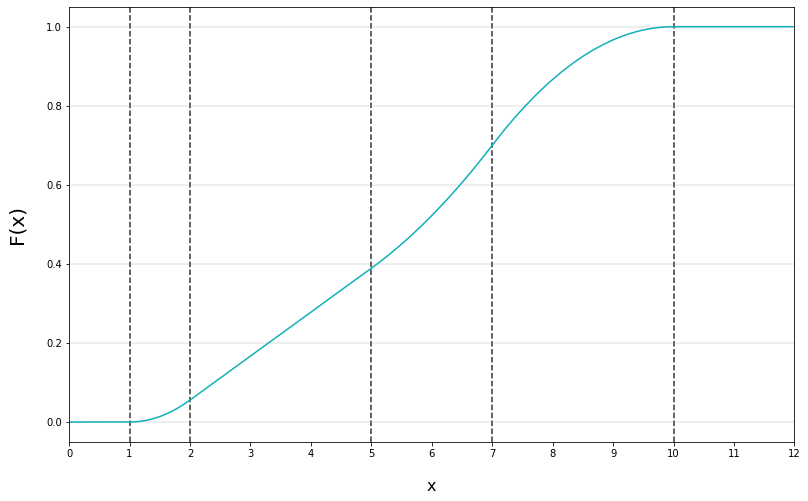

In [3]:
puntos_de_quiebre = [1, 2, 5, 7, 10]
x = np.linspace(0, 12, 500)

plt.figure(figsize=(13,8))

for punto in puntos_de_quiebre:
    plt.axvline(x=punto, linestyle='--', alpha=.8 ,color='black')
for linea in plt.gca().get_yticks():
    plt.axhline(y=linea, linestyle='-', alpha=.2 ,color='#929393')

plt.locator_params(axis="x", nbins=12)    
plt.xlabel('x', labelpad=20, size=16)
plt.ylabel('F(x)', labelpad=20, size=20)
plt.xlim([0,12])
plt.plot(x, F(x), c='#0FAFB9')
plt.show()

Por otra parte, tras el cálculo de la inversa de la función de distribución se obtuvo el siguiente resultado.

![inversa_4](img/inversa_4.png)

Siendo su gráfico el que se muestra a continuación.

In [4]:
# Se define la función de distribución
def F_inversa(x):
    x = np.array(x)
    return np.piecewise(x, [(0<=x) & (x<1/18), (1/18<=x) & (x<7/18), 
                            (7/18<=x) & (x<.7), (.7<=x) & (x<1), (0<x) & (x>=1)], 
                           [lambda x: 1 + np.sqrt(18*x),
                            lambda x: 9*(x + (1/6)),
                            lambda x: 2.5 + np.sqrt(45*(x - .25)),
                            lambda x: 10 - np.sqrt(30*(1 - x)),
                            0])

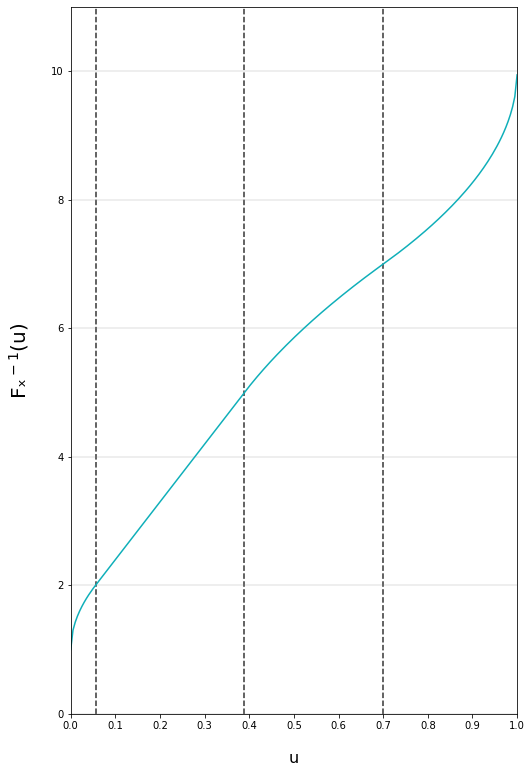

In [5]:
puntos_de_quiebre = [1/18, 7/18, .7]
x = np.linspace(0, 0.9999, 200)

plt.figure(figsize=(8,13))
plt.xlim([0,1])
plt.ylim([0,11])

for punto in puntos_de_quiebre:
    plt.axvline(x=punto, linestyle='--', alpha=.8 ,color='black')
for linea in plt.gca().get_yticks():
    plt.axhline(y=linea, linestyle='-', alpha=.2 ,color='#929393')

plt.locator_params(axis="x", nbins=18)    
plt.xlabel('u', labelpad=20, size=16)
plt.ylabel('F\u2093$^-$$^1$(u)', labelpad=20, size=20)
plt.plot(x, F_inversa(x), c='#0FAFB9')
plt.show()

#### c) Utilizando el generador de números aleatorios con distribución uniforme [0,1] implementado en el ejercicio 1 y aplicando el método de la transformada inversa, genere números al azar con la distribución propuesta.

Se toma el genador congruencial lineal (GCL) del ejercicio 1.

In [6]:
global Xo

def gcl_set_semilla(semilla=int((101187 + 102323 + 102291 + 102321)/4)):
    global Xo
    Xo = semilla

def gcl_normalizado(iteraciones):

    m = 2**32
    a = 1013904223
    c = 1664525
    global Xo

    numeros_aleatorios = []
    for i in range(iteraciones):
        X = (a * Xo + c) % m
        numeros_aleatorios.append(X/m)
        Xo = X

    return numeros_aleatorios

Se procede a aplicar el método de la transformada inversa, es decir, reemplazar los valores del GCL en la inversa de la función de distribución original. En este caso se utilizarán 50000 valores.

In [7]:
cantidad_valores = 50000

In [8]:
gcl_set_semilla()
valores_aleatorios = gcl_normalizado(cantidad_valores)
valores_generados = F_inversa(valores_aleatorios)

#### d) Realice los gráficos que considere necesarios para mostrar la distribución de números al azar generados.

A continuación se realizan dos diagramas, un gráfico de densidad y un histograma, para mostrar que los valores generados siguen la distribución requerida. 

Para ello, en primer lugar, se define la función de densidad original.

In [9]:
def f_original(x):
    x = np.array(x)
    return np.piecewise(x, [(x<1) & (x>=10), (1<=x) & (x<2), (2<=x) & (x<5), 
                            (5<=x) & (x<7), (7<=x) & (x<10)], 
                           [0,
                            lambda x: (x-1)/9,
                            lambda x: (1/9),
                            lambda x: (2*x-5)/45,
                            lambda x: (-x+10)/15])

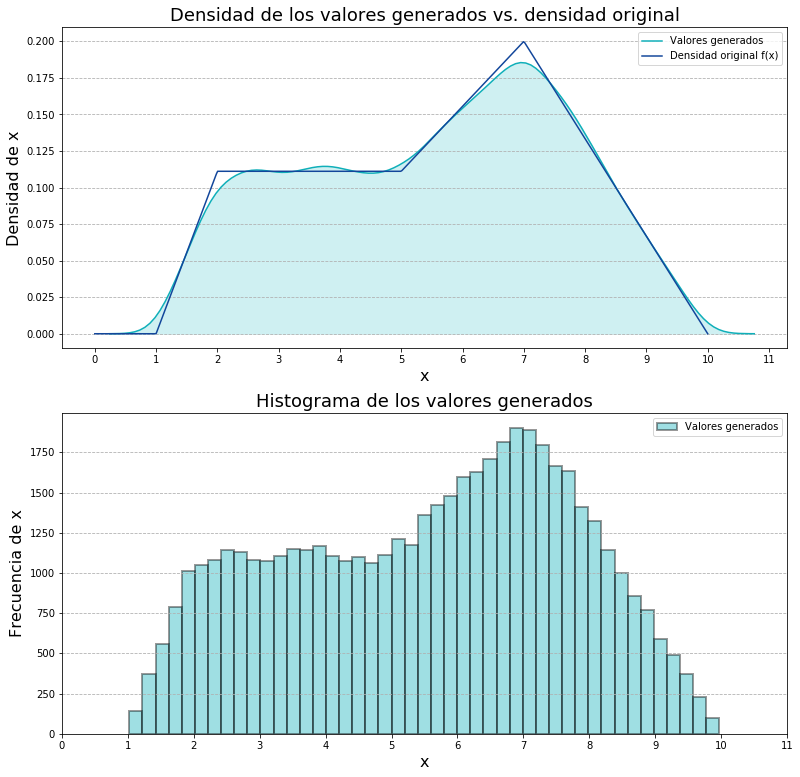

In [39]:
import seaborn as sns

original = np.linspace(0, 10, 500)

fig, (ax1, ax2) = plt.subplots(nrows=2)
fig.set_size_inches(13, 13)
# density plot
densidad_valores = sns.distplot(valores_generados, color='#0FAFB9', label="Valores generados",\
                                bins=30, ax=ax1, hist=False)
densidad_valores = sns.lineplot(x=original, y=f_original(original), color='#12469B',\
                                label="Densidad original f(x)", ax=ax1)

kde_x, kde_y = ax1.lines[0].get_data()
ax1.fill_between(kde_x, kde_y, color='#CFF0F2')

ax1.set_title("Densidad de los valores generados vs. densidad original", fontsize=18)
ax1.set_ylabel("Densidad de x", fontsize=16)
ax1.set_xlabel("x", fontsize=16)
ax1.legend(prop={'size': 10})
ax1.grid(b=True, axis='y', linestyle='--')
ax1.set_xticks(range(12))

# histogram
densidad_valores = sns.distplot(valores_generados, color='#0FAFB9', label="Valores generados",\
                                kde=False,hist_kws=dict(edgecolor="black", linewidth=2),\
                                bins=45, ax=ax2)
ax2.set_title("Histograma de los valores generados", fontsize=18)
ax2.set_ylabel("Frecuencia de x", fontsize=16)
ax2.set_xlabel("x", fontsize=16)
ax2.legend(prop={'size': 10})
ax2.grid(b=True, axis='y', linestyle='--')
ax2.set_xticks(range(12))
plt.show()